In [138]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [139]:
df = pd.read_csv("AgeVsIncome.csv")
df.head()

,Name,Age,Income($)
0,African,52,56840
1,Albanian,34,105474
2,Arabic,39,35820
3,Armenian,36,10921
4,Azerbaijani,42,16061


No handles with labels found to put in legend.


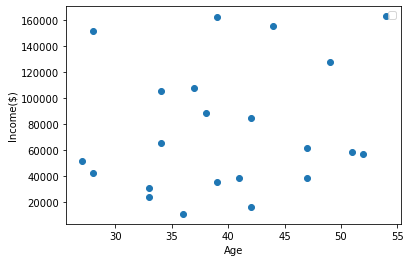

In [140]:
plt.scatter(df['Age'],df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()
plt.show()

In [141]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 2, 0, 0, 0, 0, 2, 0, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1])

In [142]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,African,52,56840,0
1,Albanian,34,105474,2
2,Arabic,39,35820,0
3,Armenian,36,10921,0
4,Azerbaijani,42,16061,0


In [101]:
km.cluster_centers_

array([[4.07142857e+01, 1.39307429e+05],
       [3.93333333e+01, 4.70416667e+04]])

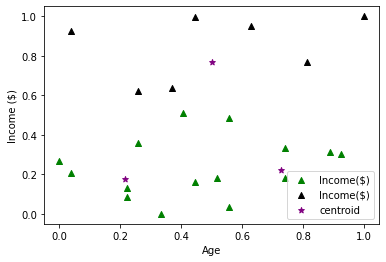

In [134]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age,df1['Income($)'],color='green',marker='^',label='Income($)')
plt.scatter(df2.Age,df2['Income($)'],color='black',marker='^',label='Income($)')
plt.scatter(df3.Age,df3['Income($)'],color='red',marker='^',label='Income($)')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [121]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($),cluster
0,African,0.925926,0.301523,1
1,Albanian,0.259259,0.620875,0
2,Arabic,0.444444,0.163497,1
3,Armenian,0.333333,0.000000,1
4,Azerbaijani,0.555556,0.033751,1


In [129]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 0, 2, 2, 1, 2, 0, 1, 0, 1, 0, 0, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0])

In [127]:
df['cluster'] = y_predicted
#df.drop('cluster'),axis='columns',inplace=True
df

,Name,Age,Income($),cluster
0,African,0.925926,0.301523,0
1,Albanian,0.259259,0.620875,1
2,Arabic,0.444444,0.163497,0
3,Armenian,0.333333,0.000000,0
4,Azerbaijani,0.555556,0.033751,0
5,Basque,0.222222,0.131440,0
6,Breton,0.370370,0.637639,1
7,Bulgarian,0.518519,0.182638,0
8,Catalan,0.814815,0.767903,1
9,Chinese,0.888889,0.311951,0


In [128]:
km.cluster_centers_

array([[0.45679012, 0.23718344],
       [0.50793651, 0.84303913]])

No handles with labels found to put in legend.


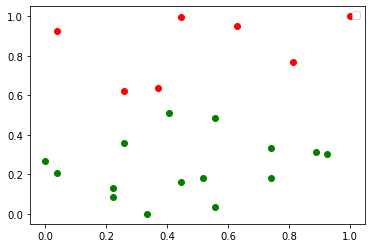

In [130]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]

plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.legend()

#plt.scatter(df.Age,df['Income($)'])

[4.044232867576541, 2.2798650774097453, 1.4721445721855193, 0.9078454256269755, 0.6803300317926876, 0.47691454652768606, 0.3269415307687151, 0.2557044752364077, 0.21119205952980652]


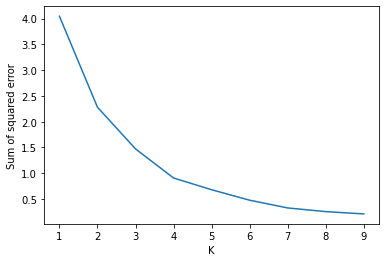

In [136]:
#Elbow Technique
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)
print(sse)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)